In [2]:
import wave
import matplotlib.pyplot as plt
import imp
import scipy.signal as sig
import numpy as np
import struct

import wavecontroller
import pitch
import bufconv
import alignpitch
import wavegenerator

%matplotlib inline

In [266]:
imp.reload(wavecontroller)
wavecontroller.show_info("data/original/a.wav")

チャンネル数: 2
サンプル幅: 2
サンプリング周波数: 44100
フレーム数: 105408
パラメータ: (2, 2, 44100, 105408, 'NONE', 'not compressed')
長さ（秒）: 2.39020408163


In [192]:
result = sig.correlate([1,4,2,3,3,2], [1,4,2,3,3,2], mode="valid")
result[:]

array([43])

array([ 95, 143, 275, 409, 469, 536, 587, 663, 711, 843])

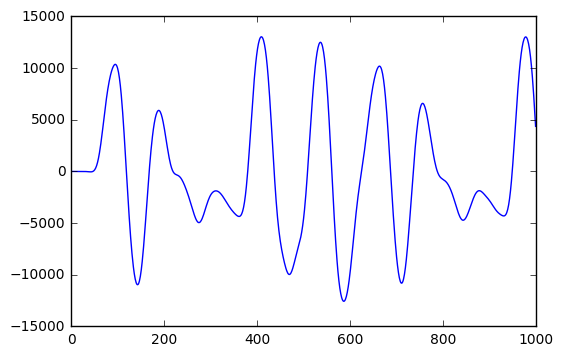

In [333]:
imp.reload(wavecontroller)
imp.reload(pitch)
wavefile = "a2.wav"
data = wavecontroller.smoothing(wavecontroller.get_data("data/original/"+wavefile), 4)

plt.plot(data[:1000])

#pitch.find_first_peak(data)
pitch.find_peaks(data, local_width=100, min_peak_distance=30)[0][:10]

700.0


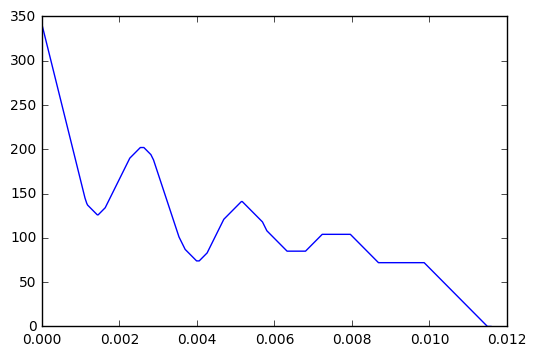

In [334]:
imp.reload(wavecontroller)
imp.reload(pitch)
wavefile = "a2.wav"
data = wavecontroller.smoothing(wavecontroller.get_data("data/original/"+wavefile), 4)

pitch.calc_pitch(data, 44100)

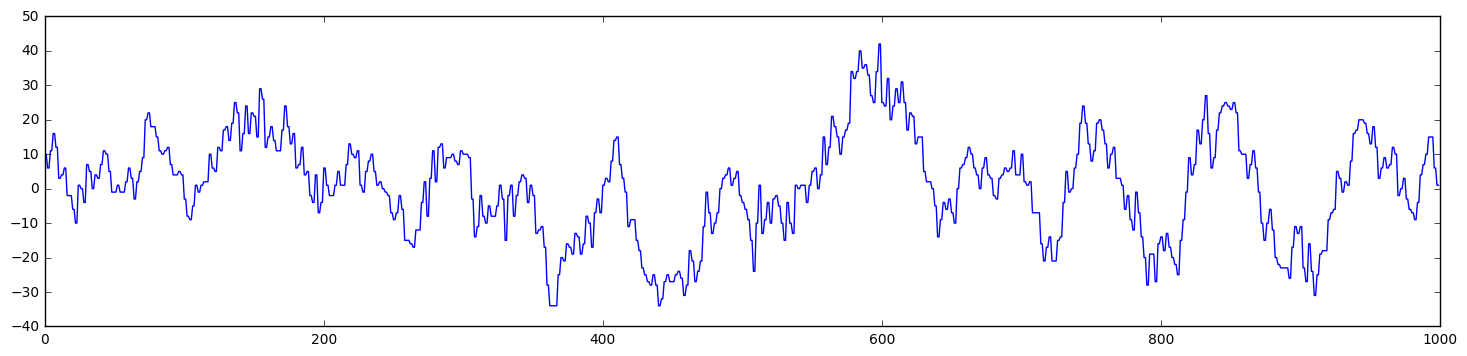

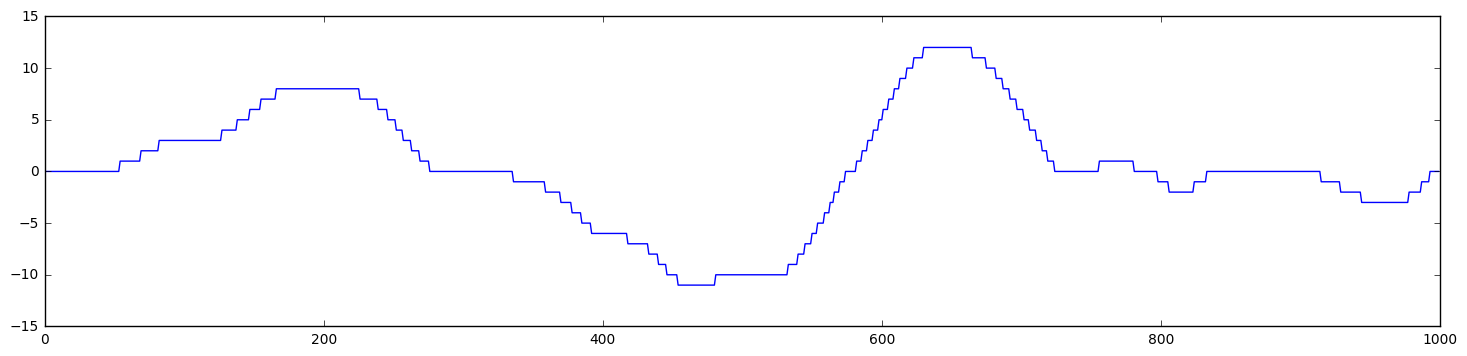

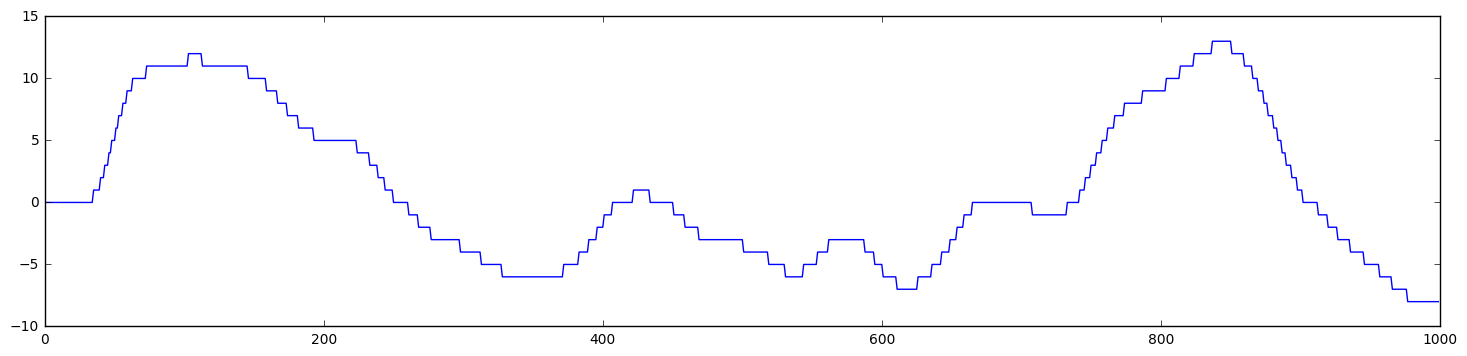

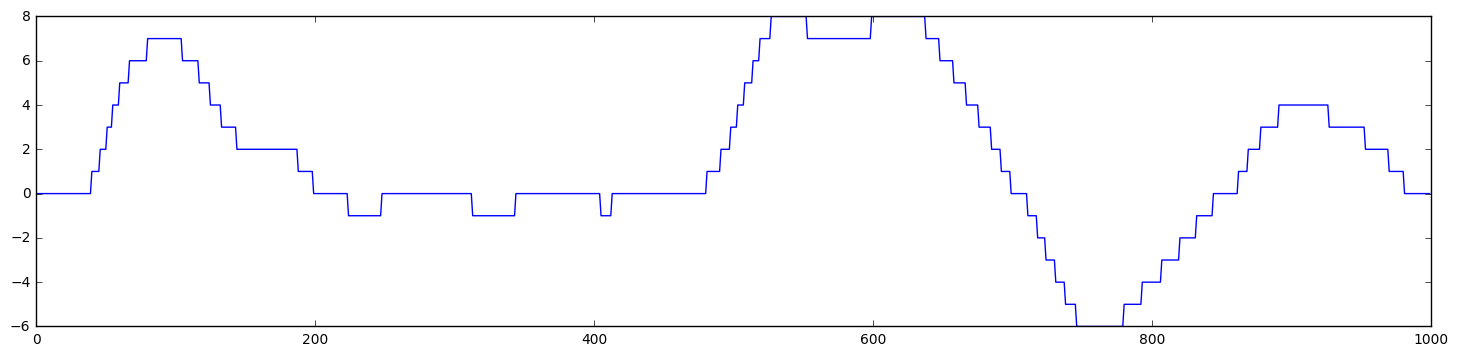

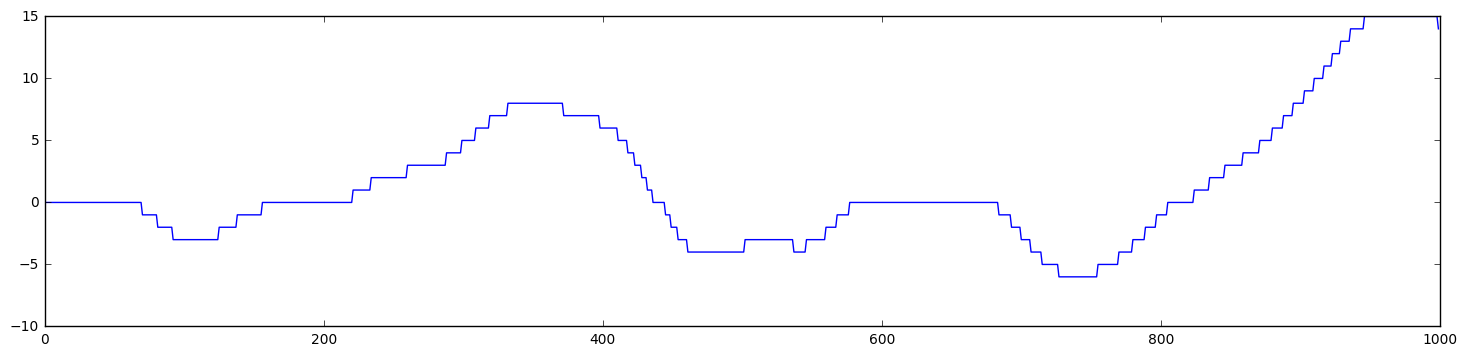

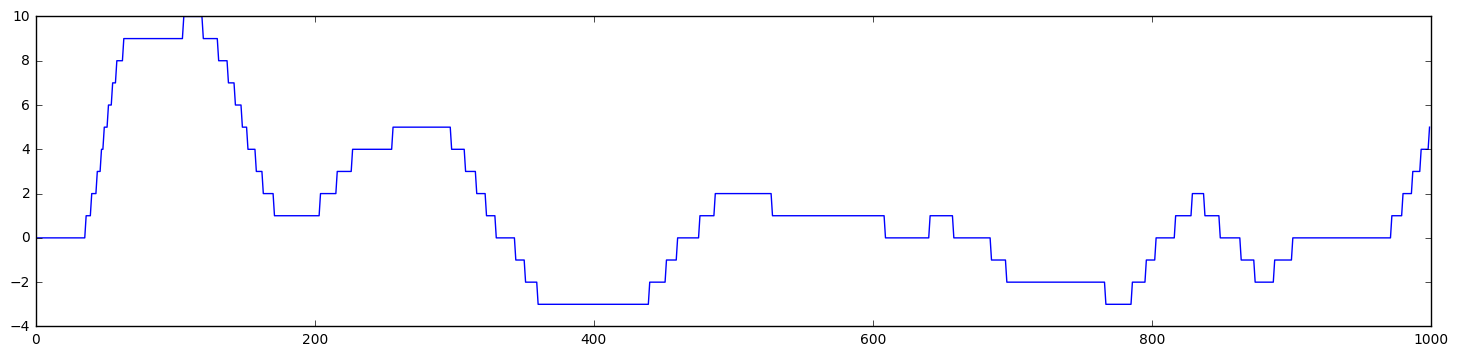

In [8]:
imp.reload(wavecontroller)

filename = "arayuru"
INPUT_SAMPLE_FREQ = 44100
PITCH_FRAME = 80

ROUGHNESS1 = 100
ROUGHNESS2 = 500
ROUGHNESS3 = 2000
ROUGHNESS4 = 7000 # 使わないほうがいいかも
ROUGHNESS5 = 9000

data = wavecontroller.get_data("data/"+filename+"/"+filename+".wav")
wavecontroller.show_image(data[:1000])

s1_data = wavecontroller.smoothing(data, ROUGHNESS1)
wavecontroller.show_image(s1_data[:1000])
wavecontroller.save_file("data/"+filename+"/s1_"+filename+".wav", s1_data, INPUT_SAMPLE_FREQ)

s2_data = wavecontroller.smoothing(data, ROUGHNESS2)
wavecontroller.show_image(s2_data[:1000])
wavecontroller.save_file("data/"+filename+"/s2_"+filename+".wav", s2_data, INPUT_SAMPLE_FREQ)

s3_data = wavecontroller.smoothing(data, ROUGHNESS3)
wavecontroller.show_image(s3_data[:1000])
wavecontroller.save_file("data/"+filename+"/s3_"+filename+".wav", s3_data, INPUT_SAMPLE_FREQ)

s4_data = wavecontroller.smoothing(data, ROUGHNESS4)
wavecontroller.show_image(s4_data[:1000])
wavecontroller.save_file("data/"+filename+"/s4_"+filename+".wav", s4_data, INPUT_SAMPLE_FREQ)

s5_data = wavecontroller.smoothing(data, ROUGHNESS5)
wavecontroller.show_image(s5_data[:1000])
wavecontroller.save_file("data/"+filename+"/s5_"+filename+".wav", s5_data, INPUT_SAMPLE_FREQ)

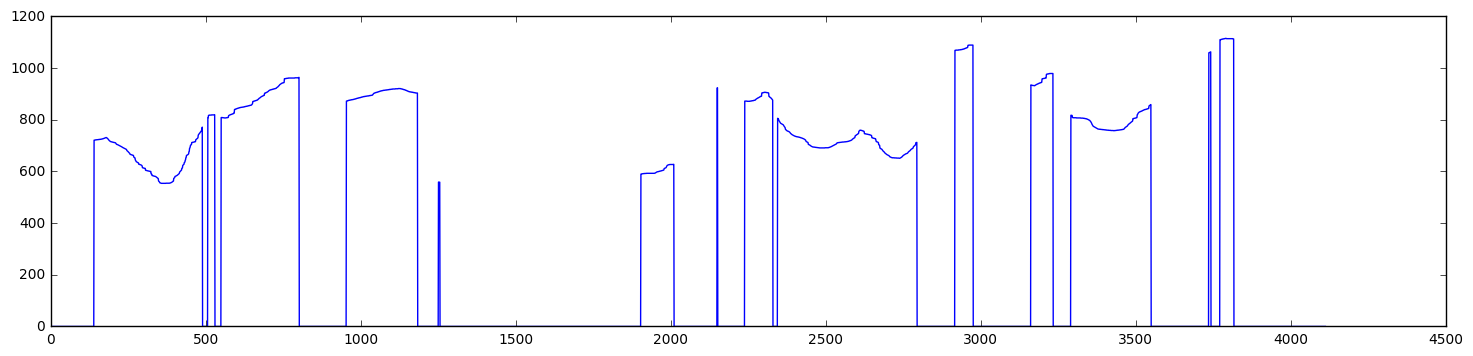

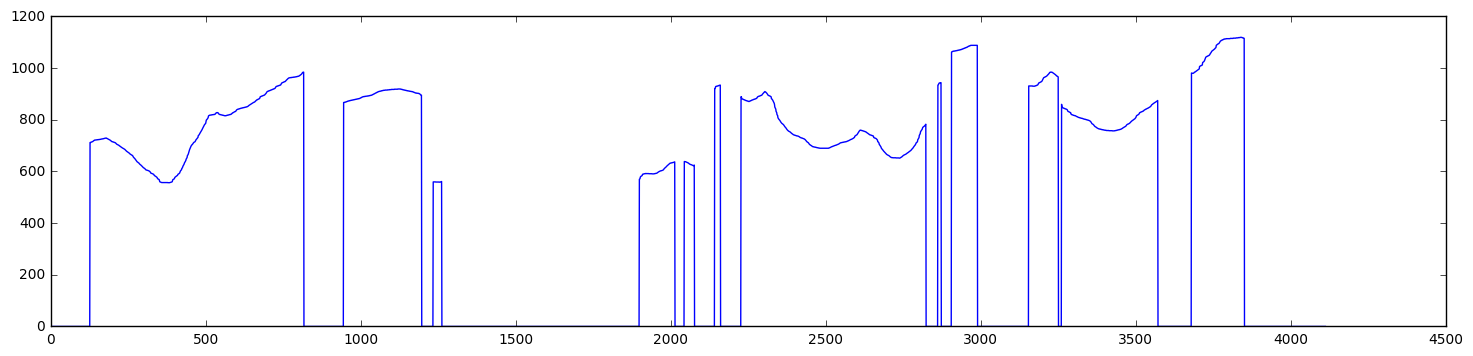

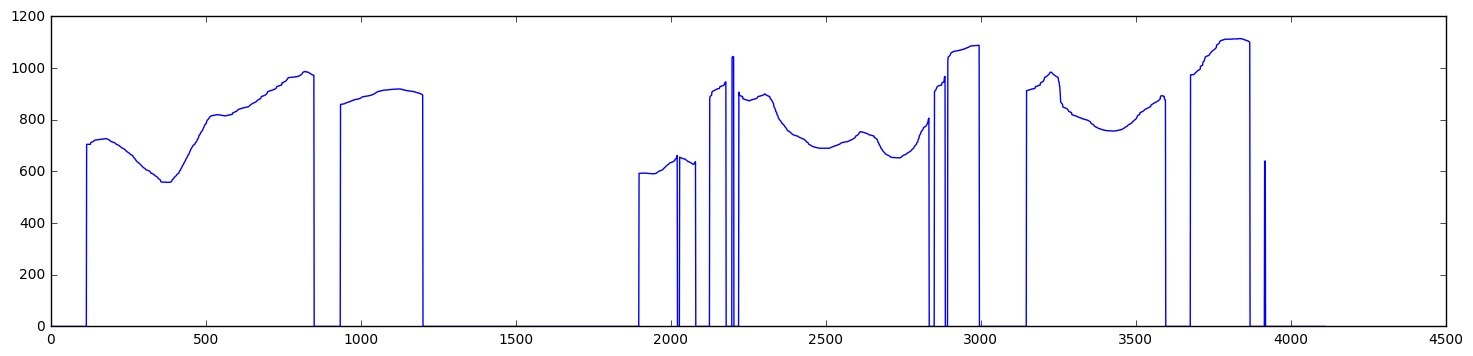

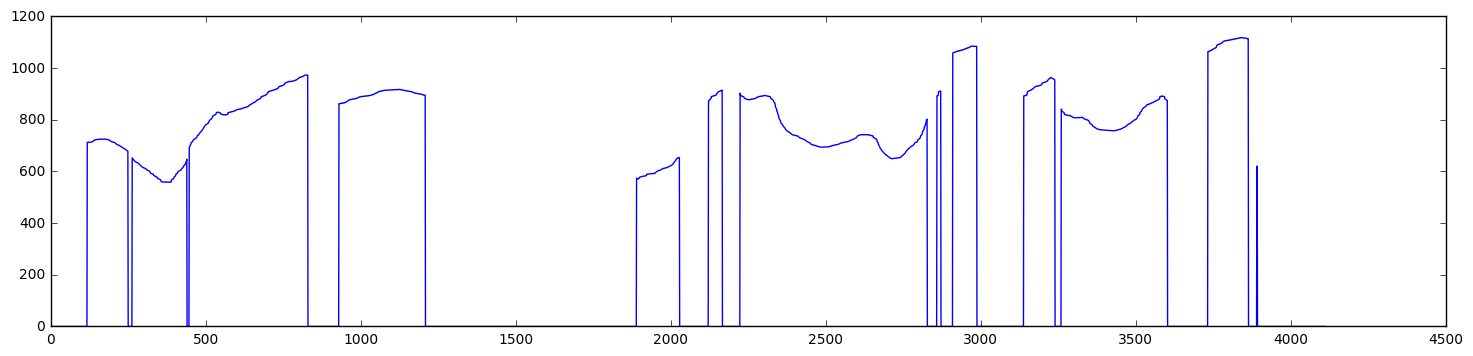

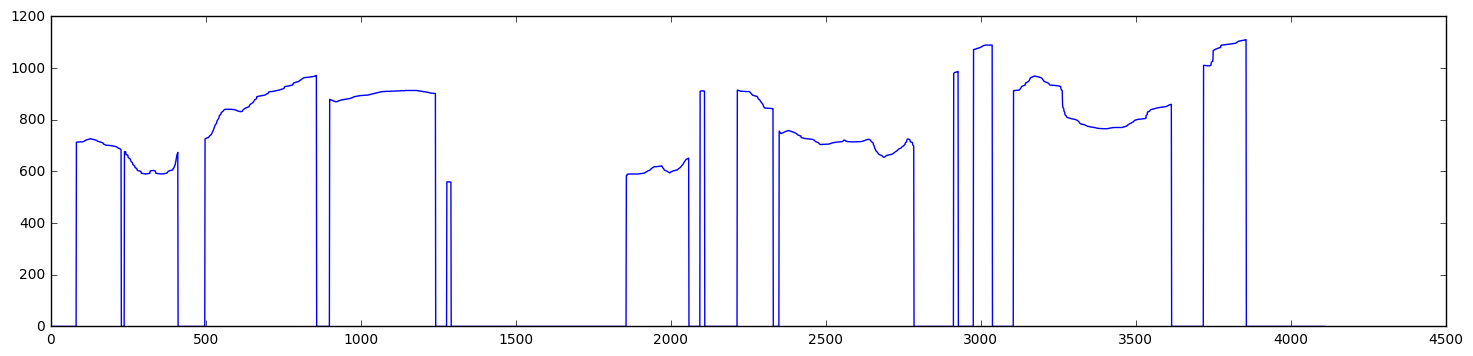

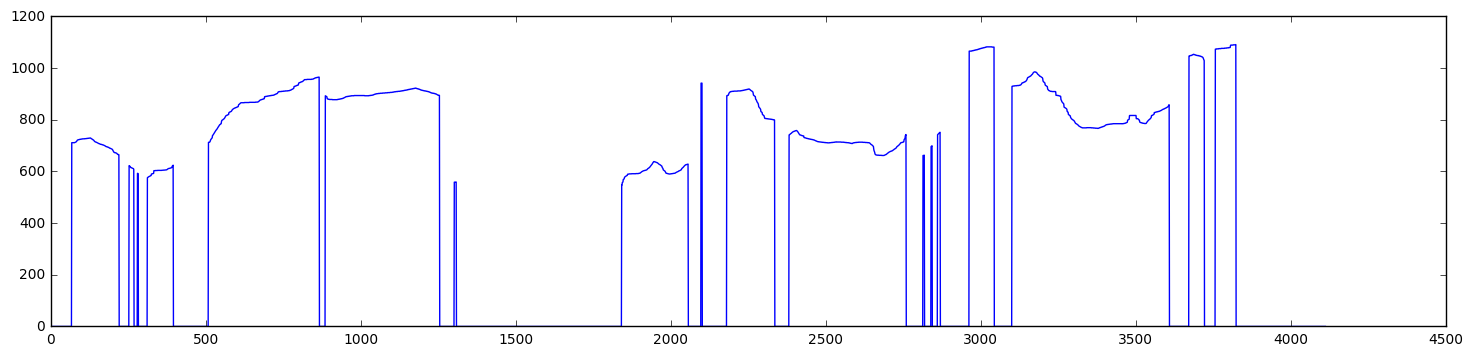

4113


In [9]:
imp.reload(bufconv)

buf_file = "data/"+filename+"/"+filename+".pitch"
results = bufconv.read_float(buf_file)
plt.figure(figsize=(18,4))
plt.plot(results)
plt.show()

buf_file = "data/"+filename+"/s1_"+filename+".pitch"
results = bufconv.read_float(buf_file)
plt.figure(figsize=(18,4))
plt.plot(results)
plt.show()

buf_file = "data/"+filename+"/s2_"+filename+".pitch"
results = bufconv.read_float(buf_file)
plt.figure(figsize=(18,4))
plt.plot(results)
plt.show()

buf_file = "data/"+filename+"/s3_"+filename+".pitch"
results = bufconv.read_float(buf_file)
plt.figure(figsize=(18,4))
plt.plot(results)
plt.show()

buf_file = "data/"+filename+"/s4_"+filename+".pitch"
results = bufconv.read_float(buf_file)
plt.figure(figsize=(18,4))
plt.plot(results)
plt.show()

buf_file = "data/"+filename+"/s5_"+filename+".pitch"
results = bufconv.read_float(buf_file)
plt.figure(figsize=(18,4))
plt.plot(results)
plt.show()

print(len(results))

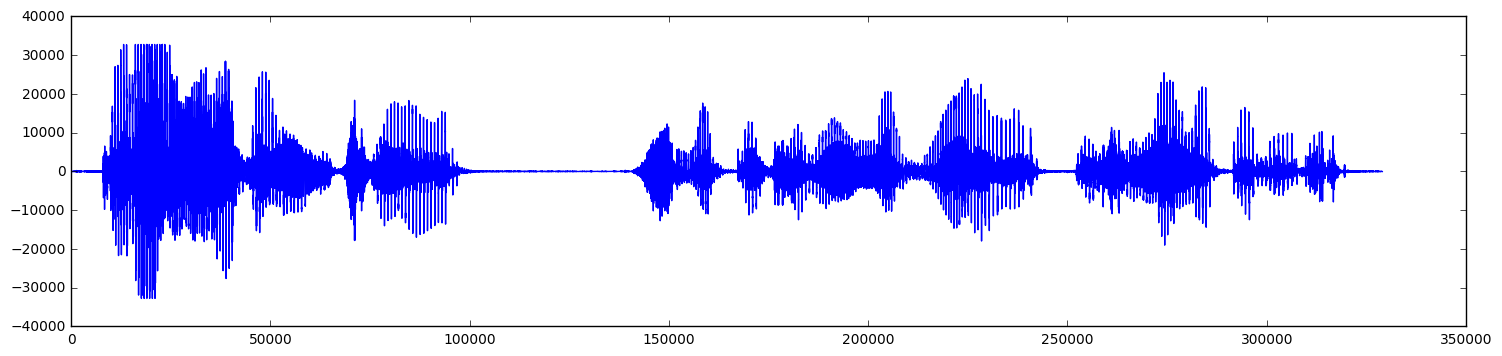

3598


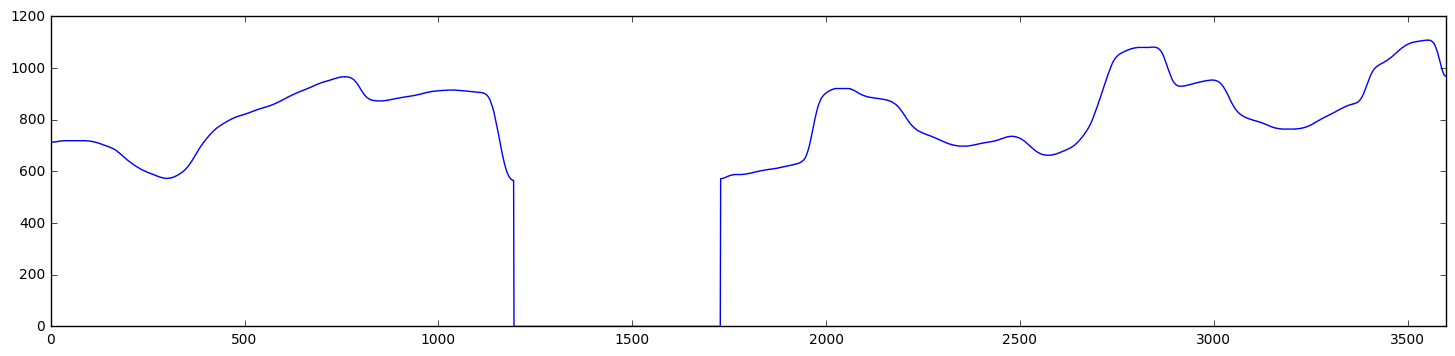

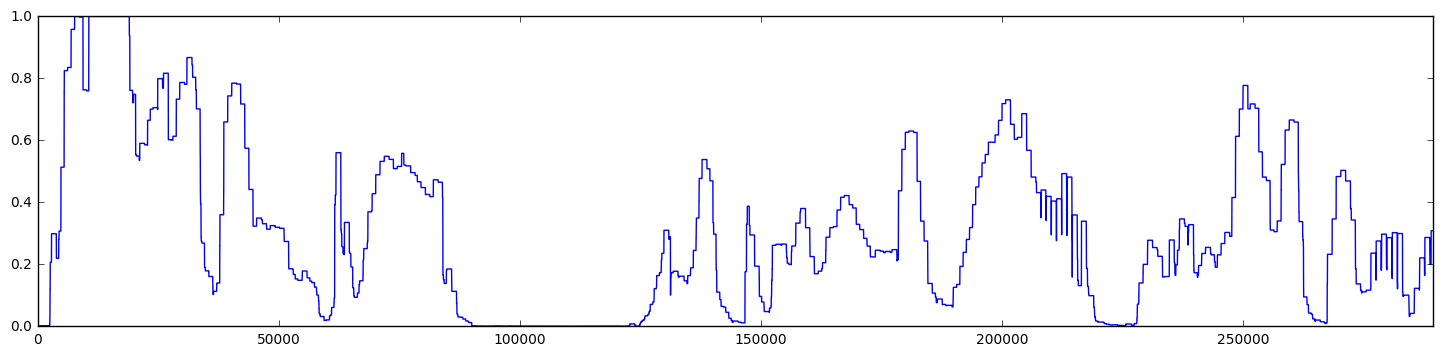

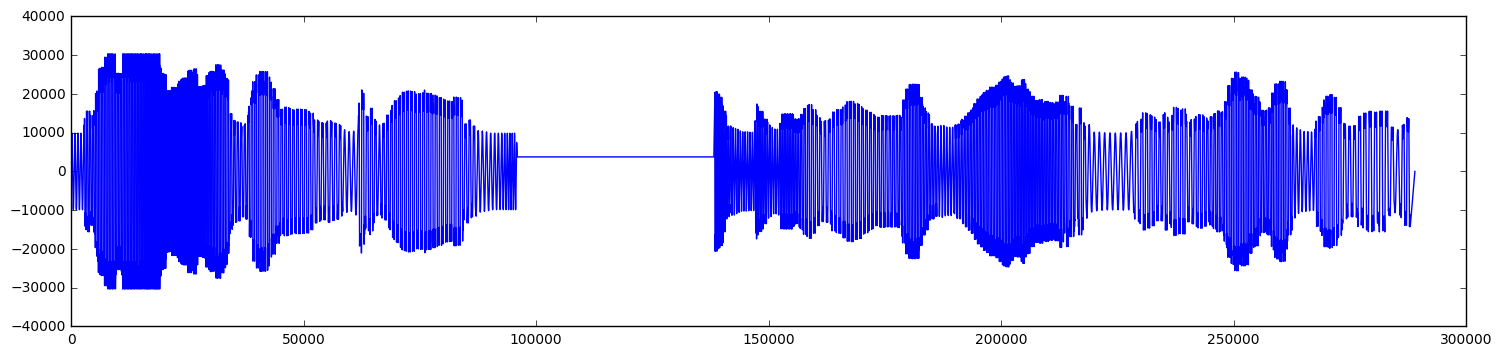

In [19]:
imp.reload(wavecontroller)
imp.reload(alignpitch)
imp.reload(wavegenerator)

# show wave file
data = wavecontroller.get_data("data/"+filename+"/"+filename+".wav")
wavecontroller.show_image(data)

# merge pitch files
buf_files = ["data/"+filename+"/"+filename+".pitch",
                     "data/"+filename+"/s1_"+filename+".pitch",
                     "data/"+filename+"/s2_"+filename+".pitch",
                     "data/"+filename+"/s3_"+filename+".pitch",
                     "data/"+filename+"/s4_"+filename+".pitch",
                     "data/"+filename+"/s5_"+filename+".pitch"]
results, remove_idxs = alignpitch.merge_pitch_file(buf_files)
bufconv.write_float("data/"+filename+"/m_"+filename+".pitch", results)
print(len(results))

# plot
plt.figure(figsize=(18,4))
plt.xlim(0, len(results))
plt.plot(results)
plt.show()

# calculate amplification
data = wavecontroller.get_data("data/"+filename+"/"+filename+".wav")
amps = wavecontroller.calc_amp(data)
remove_idxs = np.array(np.array(map(lambda n: np.arange(n*PITCH_FRAME, n*PITCH_FRAME+PITCH_FRAME), remove_idxs)).flat)
amps = np.delete(amps, remove_idxs)

# plot
plt.figure(figsize=(18,4))
plt.xlim(0, len(amps))
plt.plot(amps)
plt.show()

# generate sounds
generator = wavegenerator.generator()
freq_data = generator.pitch2freq(results, INPUT_SAMPLE_FREQ)
# data = generator.make_waves(generator.triangle_wave, freq_data, amps, PITCH_FRAME)
data = generator.make_combine_waves(generator.sin_square_wave, freq_data, amps, PITCH_FRAME)
wavecontroller.save_file("data/"+filename+"/sin_square.wav", data, generator.sample_freq)

# plot
wavecontroller.show_image(data)

In [7]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])